# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#5 Basic optimization techniques </center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.io import wavfile
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 


**Problem 1)** Find minima of following functions using gradient descent method with learning rate 0.01 and 0.1 along with different number of iterations. Try choosing a large value of learning rate and test the convergence. Plot the functions, highlight corresponding minima, and show convergence/divergence on the plot.

(a) $L_1(θ) = θ^2$

(b) $L_2(θ) = θ_1^2 + θ_2^2$

(c) $L_3(θ) = (θ - 1)^2$

(d) $L_4(θ) = 2 (θ_1-1)^2 + 2(θ_2-1)^2$


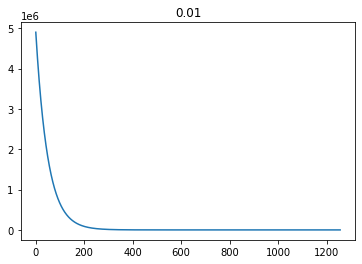

4.871862228969798e-05
1255


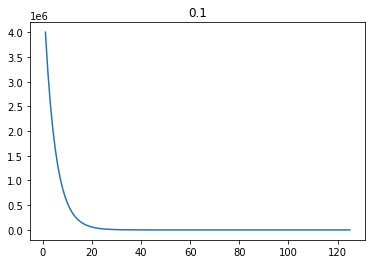

3.847852167616652e-06
125


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy
e = 0.000001
alpha = [0.01,0.1]

for i in alpha:
    cnt = 0
    theta = 5000000
    p=theta+1
    thetavalue,iterate = [],[]
    while abs(p-theta)>e:
        p = theta
        theta = theta - i*(2*theta)
        cnt+= 1
        thetavalue.append(theta)
        iterate.append(cnt)
    plt.title(i)
    plt.plot(iterate,thetavalue)
    plt.show()       
    print(theta)
    print(cnt)  

Q1 (b)


In [3]:
e = 0.000001
alpha = [0.1,0.01]
# can use while loop for |theta0-p0|>e or |theta1-p1|>e:
for i in alpha:
  theta0 = 10000
  theta1 = 50000
  p0 = theta0+1
  p1 = theta1+1
  print("Alpha",i)
  while (abs(theta0-p0)>e) or (abs(theta1-p1)>e):
        p0 = theta0
        p1 = theta1
        theta0 = theta0 - i*(2*theta0)
        theta1 = theta1 - i*(2*theta1)
        cnt+= 1  
  print("Theta0 ",theta0,"Theta1 ",theta1)
  print(cnt)  

Alpha 0.1
Theta0  6.67495948725285e-07 Theta1  3.3374797436264246e-06
230
Alpha 0.01
Theta0  9.753932283676505e-06 Theta1  4.876966141838254e-05
1257


Q1 (c)

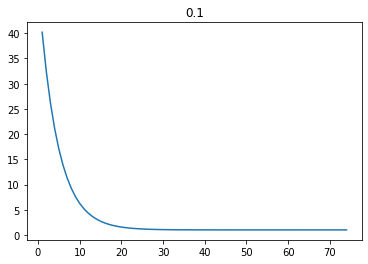

1.0000033025934667
74


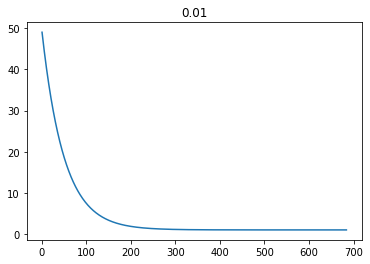

1.0000488463203852
684


In [4]:
e=0.000001
for i in alpha:
  theta0=50 
  p=theta0+1
  cnt=0
  iterate,thetavalue=[],[]
  while (abs(theta0-p)>e):
    p = theta0
    theta0 = theta0 - i*(2*(theta0-1))
    cnt+=1
    iterate.append(cnt)
    thetavalue.append(theta0)    
  plt.title(i)
  plt.plot(iterate,thetavalue)
  plt.show() 
  print(theta0)
  print(cnt)

Q1 (d)

In [5]:
for i in alpha:
   theta0=10000
   theta1=50000
   cnt=0
   print("Alpha ",i)
   while (abs(theta0-p0)>e) or (abs(theta1-p1)>e):
        p0 = theta0
        p1 = theta1
        theta0 = theta0 - i*(4*(theta0-1))
        theta1 = theta1 - i*(4*(theta1-1))
        cnt+= 1  
   print("Theta0 ",theta0,"Theta1 ",theta1)
   print(cnt)  

Alpha  0.1
Theta0  1.0000002245001247 Theta1  1.000001122590433
48
Alpha  0.01
Theta0  1.0000047274304387 Theta1  1.0000236390433557
526


**Problem 2)** Consider $A=\begin{bmatrix}
0.7 & 0.2\\
0.1 & 0.6
\end{bmatrix}$ and the observation matrix $b=\begin{bmatrix}
0.5\\
0.6
\end{bmatrix}$ in a system $Ax=b$. However, $b$ is not in column space of $A$, thus $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$. Using linear least square $x$ can be estimated by minimizing the mean squared error as,  $\min ||Ax-b||_2$. 

<br>
This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>

You need to solve this least square problem using gradient descent algortithm on $f(x)$.

<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>

Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new $x$ iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

In [32]:
#Write your code here.
x = np.array((0.4,0.6))
delta = 0.001
alpha = 0.01
A = np.array(np.mat('0.7 0.2;0.1 0.6'))
B = np.array((0.5,0.6))
p = np.array((1,1))
#X_new = np.array(())
while ( abs(p[0]-x[0])>delta or abs(p[1]-x[1])>delta):
   p = x
   x = np.subtract(x,alpha*np.subtract(A.T@A@x,A.T@B))
   cnt+=1
print("X",x)
print(cnt)

X [0.44585952 0.67836336]
1764


In [29]:
np.subtract(A.T@A@x,A.T@B)

array([-0.03817221, -0.09905004])

**Problem 3)** Apply stochastic gradient algorithm on the given dataset and estimate $\theta_0$, $\theta_1$ and final cost value. Step by step hints have been given for the same.



In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use(['ggplot'])

1) Dataset:

In [16]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

2) Visualize the data.

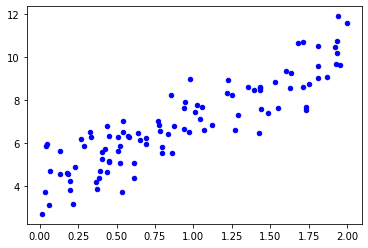

In [8]:
#Write code here
plt.scatter(X,y,s=20,color="blue")
plt.show()

3) We will write the line equation $y=m \space x+c$ in machine learning form as $J(\theta)=\theta_1 X + \theta_0$. Now choose one random sample $X_b$ (you can concatenate ones and $X$) and find $\theta_{best} = (X_b^T X_b)^{-1}X_b^Ty$.

In [9]:
#Write code here.
X_b = np.c_[np.ones(len(X)),X]
theta_best = LA.inv(X_b.T@X_b)@X_b.T@y
print(theta_best)

[[4.12462671]
 [3.0061477 ]]


4) For example choose $X_{new}=\begin{bmatrix}
0 \\
2 
\end{bmatrix}$. Obtain $X_{new_b}$ by concatinating ones and $X_{new}$. Finally find $y_{predict}=X_{new_b}\theta_{best}$.

In [10]:
#Write code here.
X_new = np.array((0,2))
X_new_b = np.c_[np.ones(len(X_new)),X_new]
y_predict = X_new_b@theta_best
print(y_predict)

[[ 4.12462671]
 [10.13692211]]


5) Visualize $X_{new}$ and $y_{predict}$.

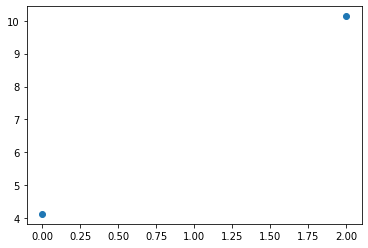

In [11]:
#Write code here.
plt.scatter(X_new,y_predict)
plt.show()

6) Define the cost function.

In [12]:
def  cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

7) Define the gradient descent function.

In [13]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
         prediction = np.dot(X,theta)  
         theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
         theta_history[it,:] =theta.T
         cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history

8) Using learning rate $0.01$ and $1000$ iterations find $\theta_0$, $\theta_1$ and final cost.

In [14]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.909,
Theta1:          3.200
Final cost/MSE:  4229.047


9) Plot $J(\theta)$ and iterations.

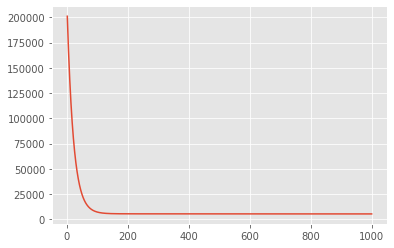

In [ ]:
#Write code here.
plt.plot(range(1,1001),cost_history)

10) You can also observe the changes in cost function.

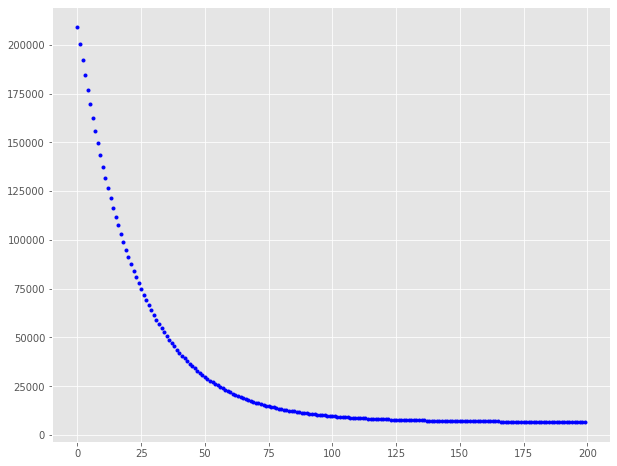

In [ ]:
#Write code here.



**Problem 4)** Find minimum of the function $L(θ)$ = using stochastic gradient descent method (take the data from the excel sheet given). Choose different learning rates and number of iterations.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy
from google.colab import files
uploaded = files.upload()

4.814454953066797e-05 1.0
834


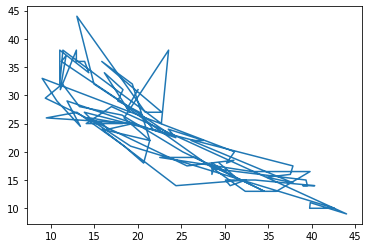

In [36]:
import pandas as pd
import random

#Read the excel sheet given
df = pd.read_csv('data.csv')
x = np.array(df['x'])
y = np.array(df['y'])
#noralize x
# I use the min max normalize
max_valueofy = np.max(y)
min_valueofy = np.min(y)
max_valueofx = np.max(x)
min_valueofx = np.min(x)
differencey = max_valueofy - min_valueofy
differencex = max_valueofx - min_valueofx
X_normalize = np.array(())
for i in x:
  value = ((i-min_valueofx)/ differencex)*differencey + min_valueofy
  X_normalize = np.append(X_normalize,value)
plt.plot(X_normalize,y)

In [50]:
#print(X_normalize)
theta1 = 1000
theta2 = 500
eps = 1e-6
alpha = 0.001
cnt = 0
prev1 = theta1+1
prev2 = theta2+1
cnt = 0
# use while loop for |prev1-theta1| >= eps or |prev2-theta2| >= eps:
# I use hypothesis as H(x) = theta1 + theta2*x
# Use the MSE
thetas=np.array(())
while (abs(prev1-theta1)>eps or abs(prev2-theta2)>eps):
  prev1 = theta1
  prev2 = theta2
  end = len(X_normalize)
  x = random.randrange(end)
  #print(X_normalize[x])
  temp1 = theta1 - alpha*(2*((theta1+theta2*X_normalize[x])-y[x]))
  temp2 = theta2 - alpha*(2*((theta1+theta2*X_normalize[x])-y[x])*X_normalize[x])
  theta1 = temp1
  theta2 = temp2
  #print(theta1)
  #print(theta2)
  cnt+= 1      
print(theta1,theta2)
#print(thetas[-1])
print(cnt)

39.66159946655364 -0.7376413907099918
116215
